# Final Project Title goes here

## Step 1: Problem Definition
**<span style="color:red;">TODO:</span> @Nicholas, @Logan define your objective/problem definition here. Here are some questions you should consider:**

1. **Business Objective**: What is the business problem you want to solve? What is the overarching goal or objective of the project?

2. **Problem Type**: What type of problem are you trying to solve? Is it a regression problem (predicting a continuous value), classification problem (assigning labels to instances), clustering problem (grouping similar instances together), time series forecasting (predicting future values based on past observations), or something else?

3. **Stakeholders**: Who are the stakeholders or end users of the solution?

## Step 2: Acquiring and loading the data set
**<span style="color:red;">TODO:</span> @Nicholas, @Logan you should provide some context about your dataset. Here are some questions you should consider:**

1. **Source of the Data:** Where did the dataset come from? Is it publicly available data, data from a specific research project, or data from a company or organization?

2. **Variables and Features:** What do each of the columns represent? For example:
- `Model`: The make and model of the vehicle
- `Displ`: Engine displacement in liters.
- ...

3. **Data Collection**: How did you collect the data?

### Imports

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

# Set display options to show all columns
pd.set_option('display.max_columns', None)

### Loading the dataset

In [79]:
# List of directories containing raw data files
directories = ["../data/raw/2000/"]

# Initialize an empty list to store dataframes
dfs = []

# Iterate through each directory
for directory in directories:
    # Extract the substring containing the year prefix (e.g. "20") using slicing
    year_prefix = directory.split("/")[-2][:2]

    # Iterate through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".xlsx") or filename.endswith(".xls"):
            # Read the Excel file into a dataframe
            df = pd.read_excel(os.path.join(directory, filename))

            # Extract the substring containing the year suffix (e.g. "24") using slicing
            year_suffix = filename.split(".")[0][-2:]
            
            # Combine the year prefix and suffix to make the entire year (e.g. "2024")
            year = f"{year_prefix}{year_suffix}"
            
            # Add a new column 'Year' with the respective year
            df['Year'] = year
            
            # Append the dataframe to the list
            dfs.append(df)

# Concatenate all dataframes into a single dataframe
merged_data = pd.concat(dfs, ignore_index=True)

# Now, merged_data contains all data from the files with a new column 'Year'
merged_data

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Year,Sales Area,FE Calc Appr,Unadj Cmb MPG
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,2020,NaN,NaN,NaN
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,2020,NaN,NaN,NaN
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,2020,NaN,NaN,NaN
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,2020,NaN,NaN,NaN
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387,2020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58440,VOLVO XC90 B5,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B70,Federal Tier 3 Bin 70,RVVXJ02.0U70,standard SUV,5,22,27,24,5,No,369,2024,NaN,NaN,NaN
58441,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,RVVXJ02.0S30,standard SUV,7,20,26,23,5,No,393,2024,NaN,NaN,NaN
58442,VOLVO XC90 B6,2.0,4.0,SemiAuto-8,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,RVVXJ02.0S30,standard SUV,7,20,26,23,5,No,393,2024,NaN,NaN,NaN
58443,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,RVVXJ02.0P30,standard SUV,7,26/59,27/57,27/58,9,Yes,137,2024,NaN,NaN,NaN


## Step 3: Store the information
This step is not needed. Onto the next step...

## Step 4: Perform a descriptive analysis
**<span style="color:red;">TODO:</span> @Nicholas, @Logan we may determine to add additional features to your time series at a later time which would result in a multivariate time series model. If that is determined, then a descriptive analysis would be appropriate. For now, focus on developing a univariate time series model to forecast your target `City MPG` (ignore all other features aside from `Year`).**

## Step 5: Perform a full EDA

In [80]:
# See fist 5 rows
merged_data.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2,Year,Sales Area,FE Calc Appr,Unadj Cmb MPG
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,2020,NaN,NaN,NaN
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV02.4KH3,small car,3,24,34,28,6,No,316,2020,NaN,NaN,NaN
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,2020,NaN,NaN,NaN
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,LHNXV03.0ABC,small SUV,3,26,27,27,6,No,333,2020,NaN,NaN,NaN
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,LHNXV03.5PBM,small SUV,3,20,27,23,5,No,387,2020,NaN,NaN,NaN


#### Drop duplicates

In [81]:
nrows, ncolumns = merged_data.shape
print(f"Dimensionality before removing duplicates: ({nrows}, {ncolumns})")

Dimensionality before removing duplicates: (58445, 22)


In [82]:
# Remove duplicates
merged_data.drop_duplicates(inplace=True)

In [83]:
nrows, ncolumns = merged_data.shape
print(f"Dimensionality after removing duplicates: ({nrows}, {ncolumns})")

Dimensionality after removing duplicates: (58016, 22)


#### Keep relevant columns

In [84]:
# Column names
merged_data.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2', 'Year', 'Sales Area',
       'FE Calc Appr', 'Unadj Cmb MPG'],
      dtype='object')

In [85]:
# Subset to keep relevant columns
merged_data_subset = merged_data[['Fuel', 'City MPG', 'Year']]
merged_data_subset.head()

,Fuel,City MPG,Year
0,Gasoline,24,2020
1,Gasoline,24,2020
2,Gasoline,26,2020
3,Gasoline,26,2020
4,Gasoline,20,2020


#### Missing values

In [86]:
# Inspect proportion of missing values across all columns
missing_proportion = round(merged_data_subset.isnull().sum(axis=0) / len(merged_data_subset), 4)

print("Proportion of missing values for each column (before dropping):")
print(missing_proportion)

Proportion of missing values for each column (before dropping):
Fuel        0.0000
City MPG    0.0531
Year        0.0000
dtype: float64


In [87]:
# Create a copy of the DataFrame
clean_df = merged_data_subset.copy()

In [88]:
# Drop rows with missing values in 'City MPG' column
clean_df.dropna(subset=['City MPG'], inplace=True)

In [89]:
# Calculate the threshold for dropping columns based on 50% missing values
threshold = len(clean_df) * 0.5

# Drop columns where at least 50% of the data is missing
clean_df.dropna(axis=1, thresh=threshold, inplace=True)

In [90]:
# Inspect proportion of missing values across all columns
missing_proportion = round(clean_df.isnull().sum(axis=0) / len(clean_df), 4)

print("Proportion of missing values for each column (after dropping):")
print(missing_proportion)

Proportion of missing values for each column (after dropping):
Fuel        0.0
City MPG    0.0
Year        0.0
dtype: float64


#### Standardizing `Fuel`
Below we see some spelling/capitalization inconsistencies with `Fuel` values.

In [91]:
# Get unique values for `Fuel` before standardizing
clean_df['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Electricity', 'Diesel',
       'Ethanol/Gas', 'Hydrogen', 'CNG/Gasoline', 'CNG', 'ethanol/gas',
       'ethanol', 'diesel', 'Gasoline/Electricty', 'Electricity/Gasoline',
       'CNG/gas', 'Ethanol'], dtype=object)

Standardize the values by correcting any misspellings, capitalization inconsistencies, or variations in representation to ensure that each unique value in the `Fuel` column is consistently represented in the dataset.

In [92]:
# Define a mapping dictionary to map variations to their standardized form
fuel_mapping = {
    'Gasoline': 'Gasoline',
    'Gasoline/Electricity': 'Gasoline/Electricity',
    'Electricity': 'Electricity',
    'Diesel': 'Diesel',
    'Ethanol/Gas': 'Ethanol/Gas',
    'Hydrogen': 'Hydrogen',
    'CNG/Gasoline': 'CNG/Gasoline',
    'CNG': 'CNG',
    'ethanol/gas': 'Ethanol/Gas',
    'ethanol': 'Ethanol',
    'diesel': 'Diesel',
    'Gasoline/Electricty': 'Gasoline/Electricity',
    'Electricity/Gasoline': 'Gasoline/Electricity',
    'CNG/gas': 'CNG/Gasoline',
    'Ethanol': 'Ethanol',
    # Add more mappings if needed
}

# Map the values in the 'Fuel' column using the mapping dictionary
clean_df['Fuel'] = clean_df['Fuel'].map(fuel_mapping)

In [93]:
# Get unique values for `Fuel` after standardizing
clean_df['Fuel'].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Electricity', 'Diesel',
       'Ethanol/Gas', 'Hydrogen', 'CNG/Gasoline', 'CNG', 'Ethanol'],
      dtype=object)

#### Standardizing `City MPG`
`dtype('O')` represents the data type 'object'. This indicates that the column tmay contain text data, such as strings, but it can also include other non-numeric types like datetime objects, Python objects, or even a mix of different types.

In [96]:
# Get the data type of the column
clean_df['City MPG'].dtype

dtype('O')

Lets attempt to make the column numeric.

In [98]:
try:
    # Convert the column to numeric
    clean_df['City MPG'] = pd.to_numeric(clean_df['City MPG'])
except ValueError as e:
    print("ValueError occurred:", e)

ValueError occurred: Unable to parse string "21/49" at position 88


Although most rows look numeric, there are some that cannot be parsed as numeric. Lets further inspect these cases.

In [100]:
# Filter the DataFrame to view rows that do not contain typical integer values
invalid_rows = clean_df[pd.to_numeric(clean_df['City MPG'], errors='coerce').isnull()]
print("Rows with non-integer values:")
invalid_rows

Rows with non-integer values:


,Fuel,City MPG,Year
88,Gasoline/Electricity,21/49,2020
89,Gasoline/Electricity,21/49,2020
94,Gasoline/Electricity,25/64,2020
95,Gasoline/Electricity,25/64,2020
144,Gasoline/Electricity,17/43,2020
...,...,...,...
58424,Gasoline/Electricity,30/74,2024
58437,Gasoline/Electricity,28/66,2024
58438,Gasoline/Electricity,28/66,2024
58443,Gasoline/Electricity,26/59,2024


Lets replace `City MPG` for these rows with the average of the two integers listed.

In [110]:
# A function to extract and calculate the average of two numeric-looking values
def replace_slash_with_average(value):
    # Check if the value contains a slash and two numeric-looking values
    if '/' in value:
        parts = value.split('/')
        if all(re.match(r'^\d+$', part) for part in parts):
            # Calculate the average of the two numbers
            average = (int(parts[0]) + int(parts[1])) / 2
            return average
    return value

# Apply the function to the 'Fuel' column
clean_df['City MPG'] = clean_df['City MPG'].apply(replace_slash_with_average)

Lets attempt to make `Fuel` numeric again.

In [111]:
try:
    # Convert the column to numeric
    clean_df['City MPG'] = pd.to_numeric(clean_df['City MPG'])
except ValueError as e:
    print("ValueError occurred:", e)

ValueError occurred: Unable to parse string "N/A*" at position 5375


Uh-oh we also have rows with the string `"N/A*"`. Lets drop them.

In [113]:
# Remove rows with string "N/A*"
clean_df = clean_df[clean_df['City MPG'] != "N/A*"]

Lets try once again to make the column numeric.

In [114]:
try:
    # Convert the column to numeric
    clean_df['City MPG'] = pd.to_numeric(clean_df['City MPG'])
except ValueError as e:
    print("ValueError occurred:", e)

In [115]:
# Get the data type of the column
clean_df['City MPG'].dtype

dtype('float64')

### Aggregate data by `Fuel`, `Year`

In [119]:
# Perform the aggregation
aggregated_df = clean_df.groupby(['Fuel', 'Year']).agg({'City MPG': 'mean'})

# Reset the index to make 'Fuel' and 'Year' columns again
aggregated_df = aggregated_df.reset_index()

# Rename 'City MPG' column to 'Avg City MPG'
aggregated_df.rename(columns={'City MPG': 'Avg City MPG'}, inplace=True)

aggregated_df

,Fuel,Year,Avg City MPG
0,CNG,2000,22.333333
1,CNG,2001,14.384615
2,CNG,2002,15.250000
3,CNG,2003,13.500000
4,CNG,2004,16.200000
...,...,...,...
138,Hydrogen,2020,64.750000
139,Hydrogen,2021,67.000000
140,Hydrogen,2022,68.600000
141,Hydrogen,2023,68.600000


### Data Visualization

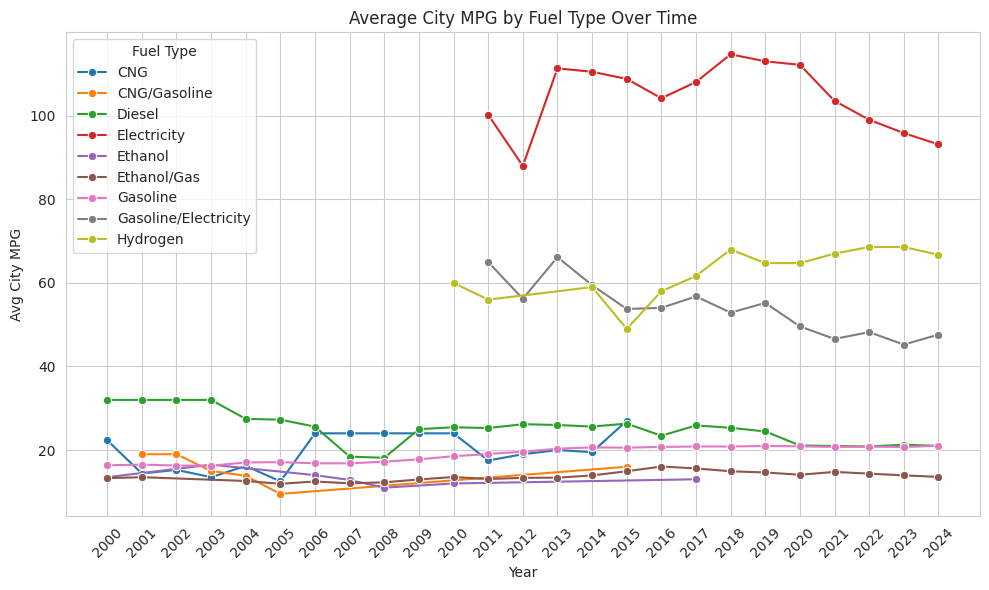

In [121]:
# Set the style
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=aggregated_df, x='Year', y='Avg City MPG', hue='Fuel', marker='o')

# Set the title and labels
plt.title('Average City MPG by Fuel Type Over Time')
plt.xlabel('Year')
plt.ylabel('Avg City MPG')

# Tilt the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

## Step 6: Build the model and optimize it